## Credit Card Fraud Detection

Dataset Source: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

#### Install Necessary Libraries

In [1]:
%pip install -U matplotlib
%pip install -U numpy
%pip install auto-sklearn seaborn sklearn imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### Import Necessary Libraries

In [2]:
import os, sys

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler,LabelEncoder

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import autosklearn
from autosklearn.classification import AutoSklearnClassifier

#### Mount Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Show Library Versions

In [4]:
n = 18

print(f"Language/Library".rjust(n-2), '|', 'Version')
print('-' * (n-2), '|', '--------')
print("Python :".rjust(n), sys.version[0:6])
print("NumPy :".rjust(n), np.__version__)
print("Pandas :".rjust(n), pd.__version__)
print("Sklearn :".rjust(n), sklearn.__version__)
print("Auto-Sklearn :".rjust(n), autosklearn.__version__)
print("Seaborn :".rjust(n), sns.__version__)

Language/Library | Version
---------------- | --------
          Python : 3.10.1
           NumPy : 1.25.0
          Pandas : 1.5.3
         Sklearn : 0.24.2
    Auto-Sklearn : 0.15.0
         Seaborn : 0.12.2


### Initial Data Preprocessing

#### Ingest Dataset

In [5]:
col_names = ["time",
             "v1",
             "v2",
             "v3",
             "v4",
             "v5",
             "v6",
             "v7",
             "v8",
             "v9",
             "v10",
             "v11",
             "v12",
             "v13",
             "v14",
             "v15",
             "v16",
             "v17",
             "v18",
             "v19",
             "v20",
             "v21",
             "v22",
             "v23",
             "v24",
             "v25",
             "v26",
             "v27",
             "v28",
             "amount",
             "target"]

data_types = {"time": np.float64,
              "v1": np.float64,
              "v2": np.float64,
              "v3": np.float64,
              "v4": np.float64,
              "v5": np.float64,
              "v6": np.float64,
              "v7": np.float64,
              "v8": np.float64,
              "v9": np.float64,
              "v10": np.float64,
              "v11": np.float64,
              "v12": np.float64,
              "v13": np.float64,
              "v14": np.float64,
              "v15": np.float64,
              "v16": np.float64,
              "v17": np.float64,
              "v18": np.float64,
              "v19": np.float64,
              "v20": np.float64,
              "v21": np.float64,
              "v22": np.float64,
              "v23": np.float64,
              "v24": np.float64,
              "v25": np.float64,
              "v26": np.float64,
              "v27": np.float64,
              "v28": np.float64,
              "amount": np.float64,
              "target": np.int64}

data = pd.read_csv("/content/drive/MyDrive/Credit Card Fraud Detection/creditcard.csv",
                   names=col_names,
                   dtype=data_types,
                   engine='c',
                   header=0)

data.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,target
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### More Dataset Information

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    284807 non-null  float64
 1   v1      284807 non-null  float64
 2   v2      284807 non-null  float64
 3   v3      284807 non-null  float64
 4   v4      284807 non-null  float64
 5   v5      284807 non-null  float64
 6   v6      284807 non-null  float64
 7   v7      284807 non-null  float64
 8   v8      284807 non-null  float64
 9   v9      284807 non-null  float64
 10  v10     284807 non-null  float64
 11  v11     284807 non-null  float64
 12  v12     284807 non-null  float64
 13  v13     284807 non-null  float64
 14  v14     284807 non-null  float64
 15  v15     284807 non-null  float64
 16  v16     284807 non-null  float64
 17  v17     284807 non-null  float64
 18  v18     284807 non-null  float64
 19  v19     284807 non-null  float64
 20  v20     284807 non-null  float64
 21  v21     28

### Visualizations

#### Create Function to Visualize Features (Barplot)

In [7]:
def barplot_visual(feature_to_visualize: pd.Series,
                   plot_title: str,
                   x_label: str,
                   y_label: str = "# of Samples",
                   ):
    """
    This function returns a histogram for a feature.

    Inputs:
    - feature_to_visualize: Feature to plot in the form
    of pandas Series.
    - plot_title: The title of the plot/visual.
    - x_label: The string label value for the x label.
    - y_label: The string label value for the y label.

    Output:
    - A Bar Plot.
    """

    assert type(feature_to_visualize) == pd.Series, \
        "Make sure the dataset input type is a Pandas Series."
    assert type(plot_title) != 'str', \
        "The title value must be a string value."
    assert type(x_label) !=  'str', \
        "The x label value must be a string value."
    assert type(y_label) != 'str', \
        "The y label value must be a string value."

    ax = feature_to_visualize.value_counts().plot.bar(
                                                      figsize=(12,8),
                                                      rot=0,
                                                      legend=False,
                                                      color=["lightgreen",
                                                             "blue",
                                                             "brown",
                                                             "lightblue",
                                                             "tan",
                                                             "yellow",
                                                             "orange",
                                                             "green",
                                                             "red",
                                                             "purple"]
                                                      )

    ax.bar_label(ax.containers[0])

    plt.suptitle('')
    plt.title(plot_title)
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    plt.show()

#### Dataset Visualization: Purchase Price

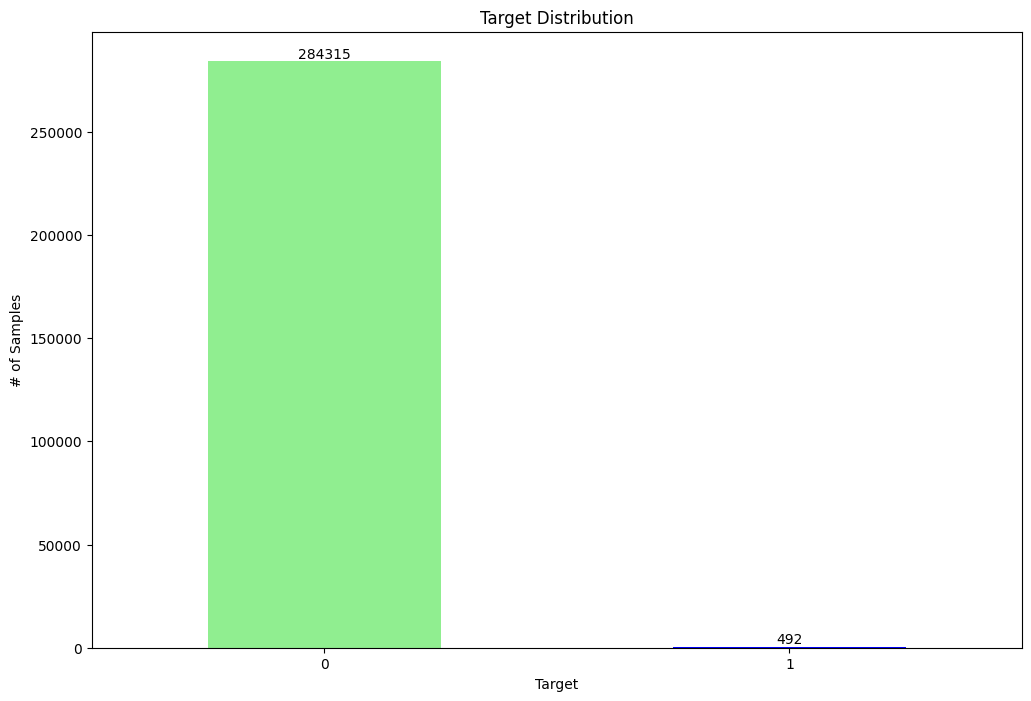

In [8]:
barplot_visual(data["target"],
               "Target Distribution",
               "Target",
               "# of Samples",
               )

#### Create Function to Visualize Features (Histograms)

In [9]:
def histogram_visual(feature_to_visualize: pd.Series,
                     num_of_bins: int,
                     plot_title: str,
                     x_label: str,
                     x_start: float = -1.0,
                     y_label: str = "# of Samples",
                     ):
    """
    This function returns a histogram for a feature.

    Inputs:
    - feature_to_visualize: Feature to plot in the form
    of pandas Series.
    - plot_title: The title of the plot/visual.
    - x_label: The string label value for the x label.
    - x_start: To force the x-axis of the visual to start at
    a specified value instead of the automatically generated
    value, assign the float value here. Otherwise, the
    autogenerated start value will be used.
    - y_label: The string label value for the y label.

    Output:
    - A histogram.
    """

    assert type(feature_to_visualize) == pd.Series, \
        "Make sure the dataset input type is a Pandas Series."
    assert type(plot_title) != 'str', \
        "The title value must be a string value."
    assert type(x_label) !=  'str', \
        "The x label value must be a string value."
    assert type(y_label) != 'str', \
        "The y label value must be a string value."
    assert type(x_start) != 'float', \
        "The x_start value must be a float value."

    ax = feature_to_visualize.hist(grid=False,
                                   bins=num_of_bins,
                                   figsize=(18, 8))
    plt.suptitle('')
    plt.title(plot_title)
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    if x_start != -1:
        plt.xlim([0, (max(feature_to_visualize) + (1/num_of_bins))])

    plt.show()

#### Dataset Visualization: Time

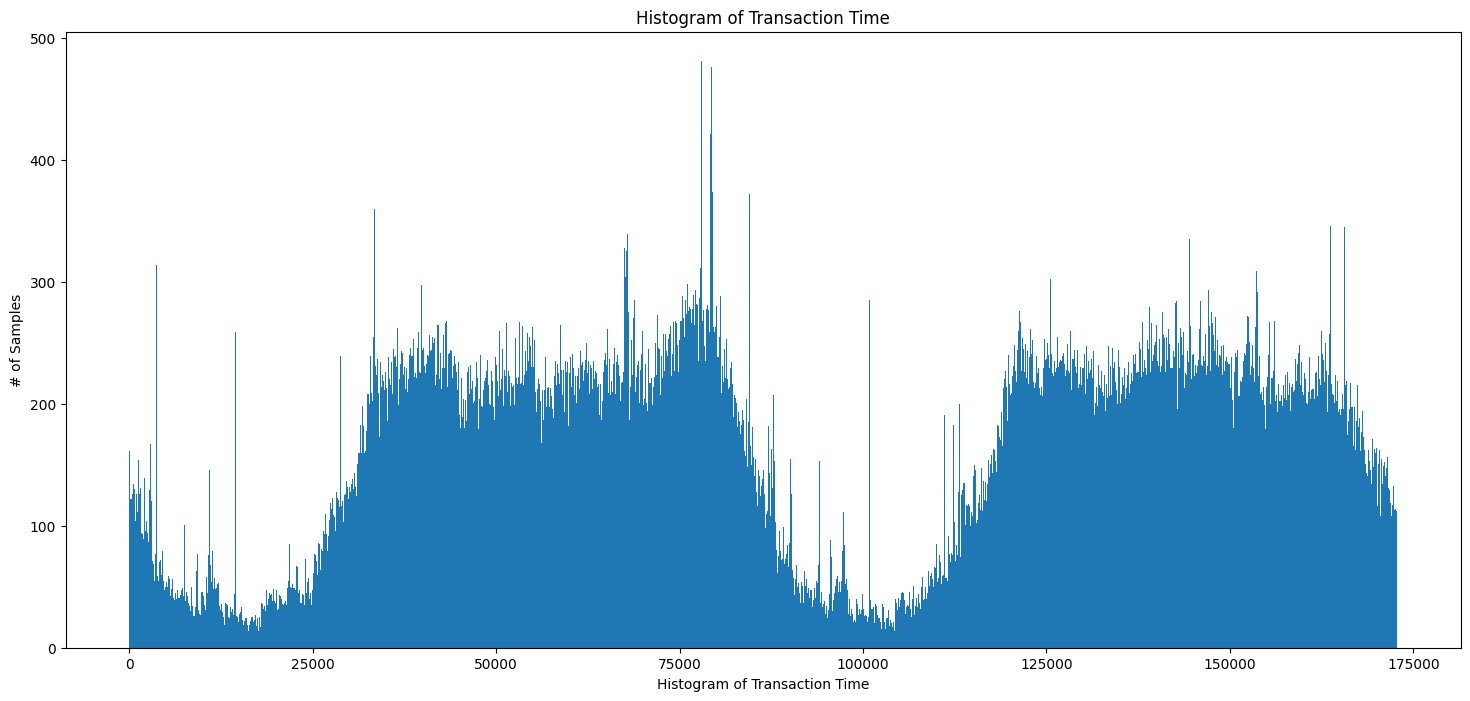

Transaction Times range from 0.0 to 172792.0.


In [10]:
histogram_visual(data['time'],
                 num_of_bins=1700,
                 plot_title="Histogram of Transaction Time",
                 x_label="Histogram of Transaction Time")

print(f"Transaction Times range from" +
      f" {min(data['time'])} to" +
      f" {max(data['time'])}.")

#### Dataset Visualization: Transaction Amount

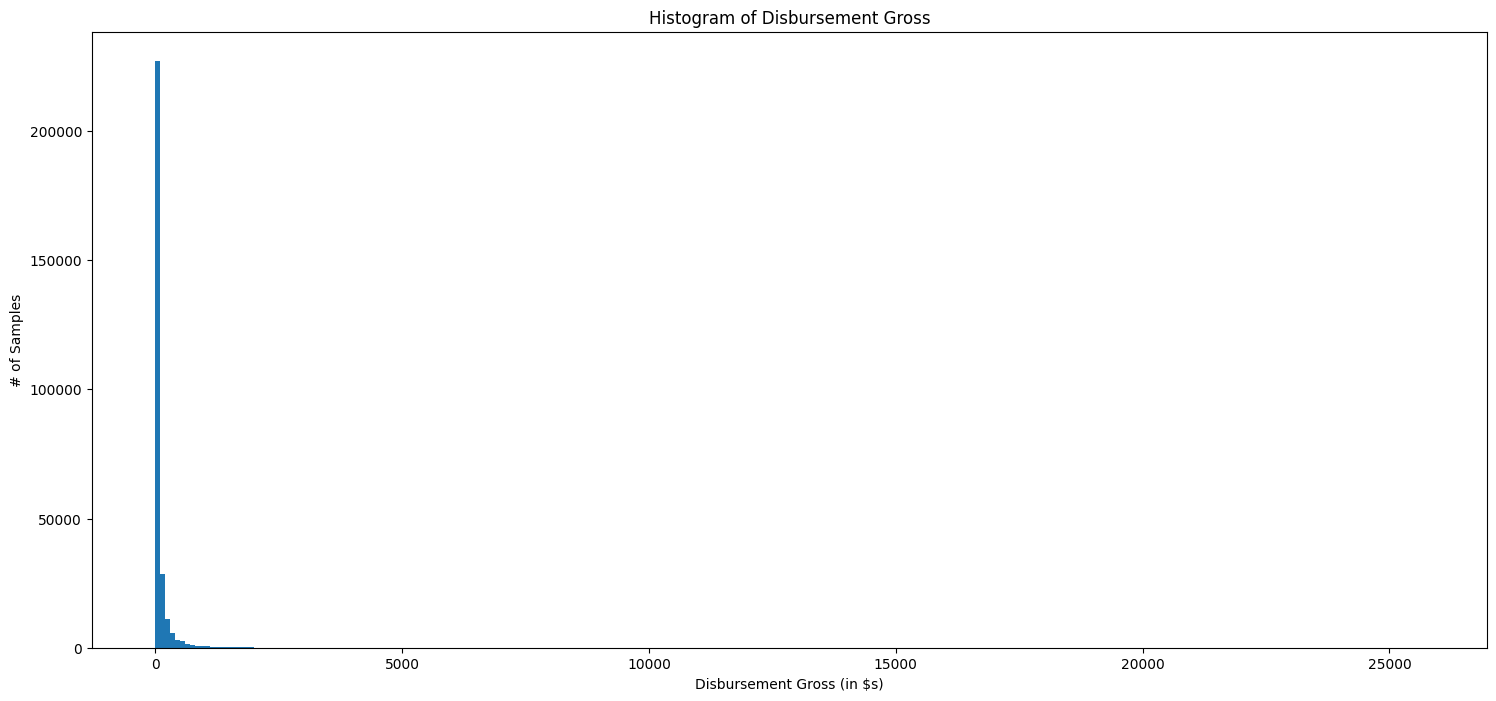

Transaction amounts range from $0.0 to $25691.16.


In [11]:
histogram_visual(data['amount'],
                 num_of_bins=257,
                 plot_title="Histogram of Disbursement Gross",
                 x_label="Disbursement Gross (in $s)")

print(f"Transaction amounts range from " +
      f"${min(data['amount'])} to" +
      f" ${max(data['amount'])}.")

#### Correlation Matrix

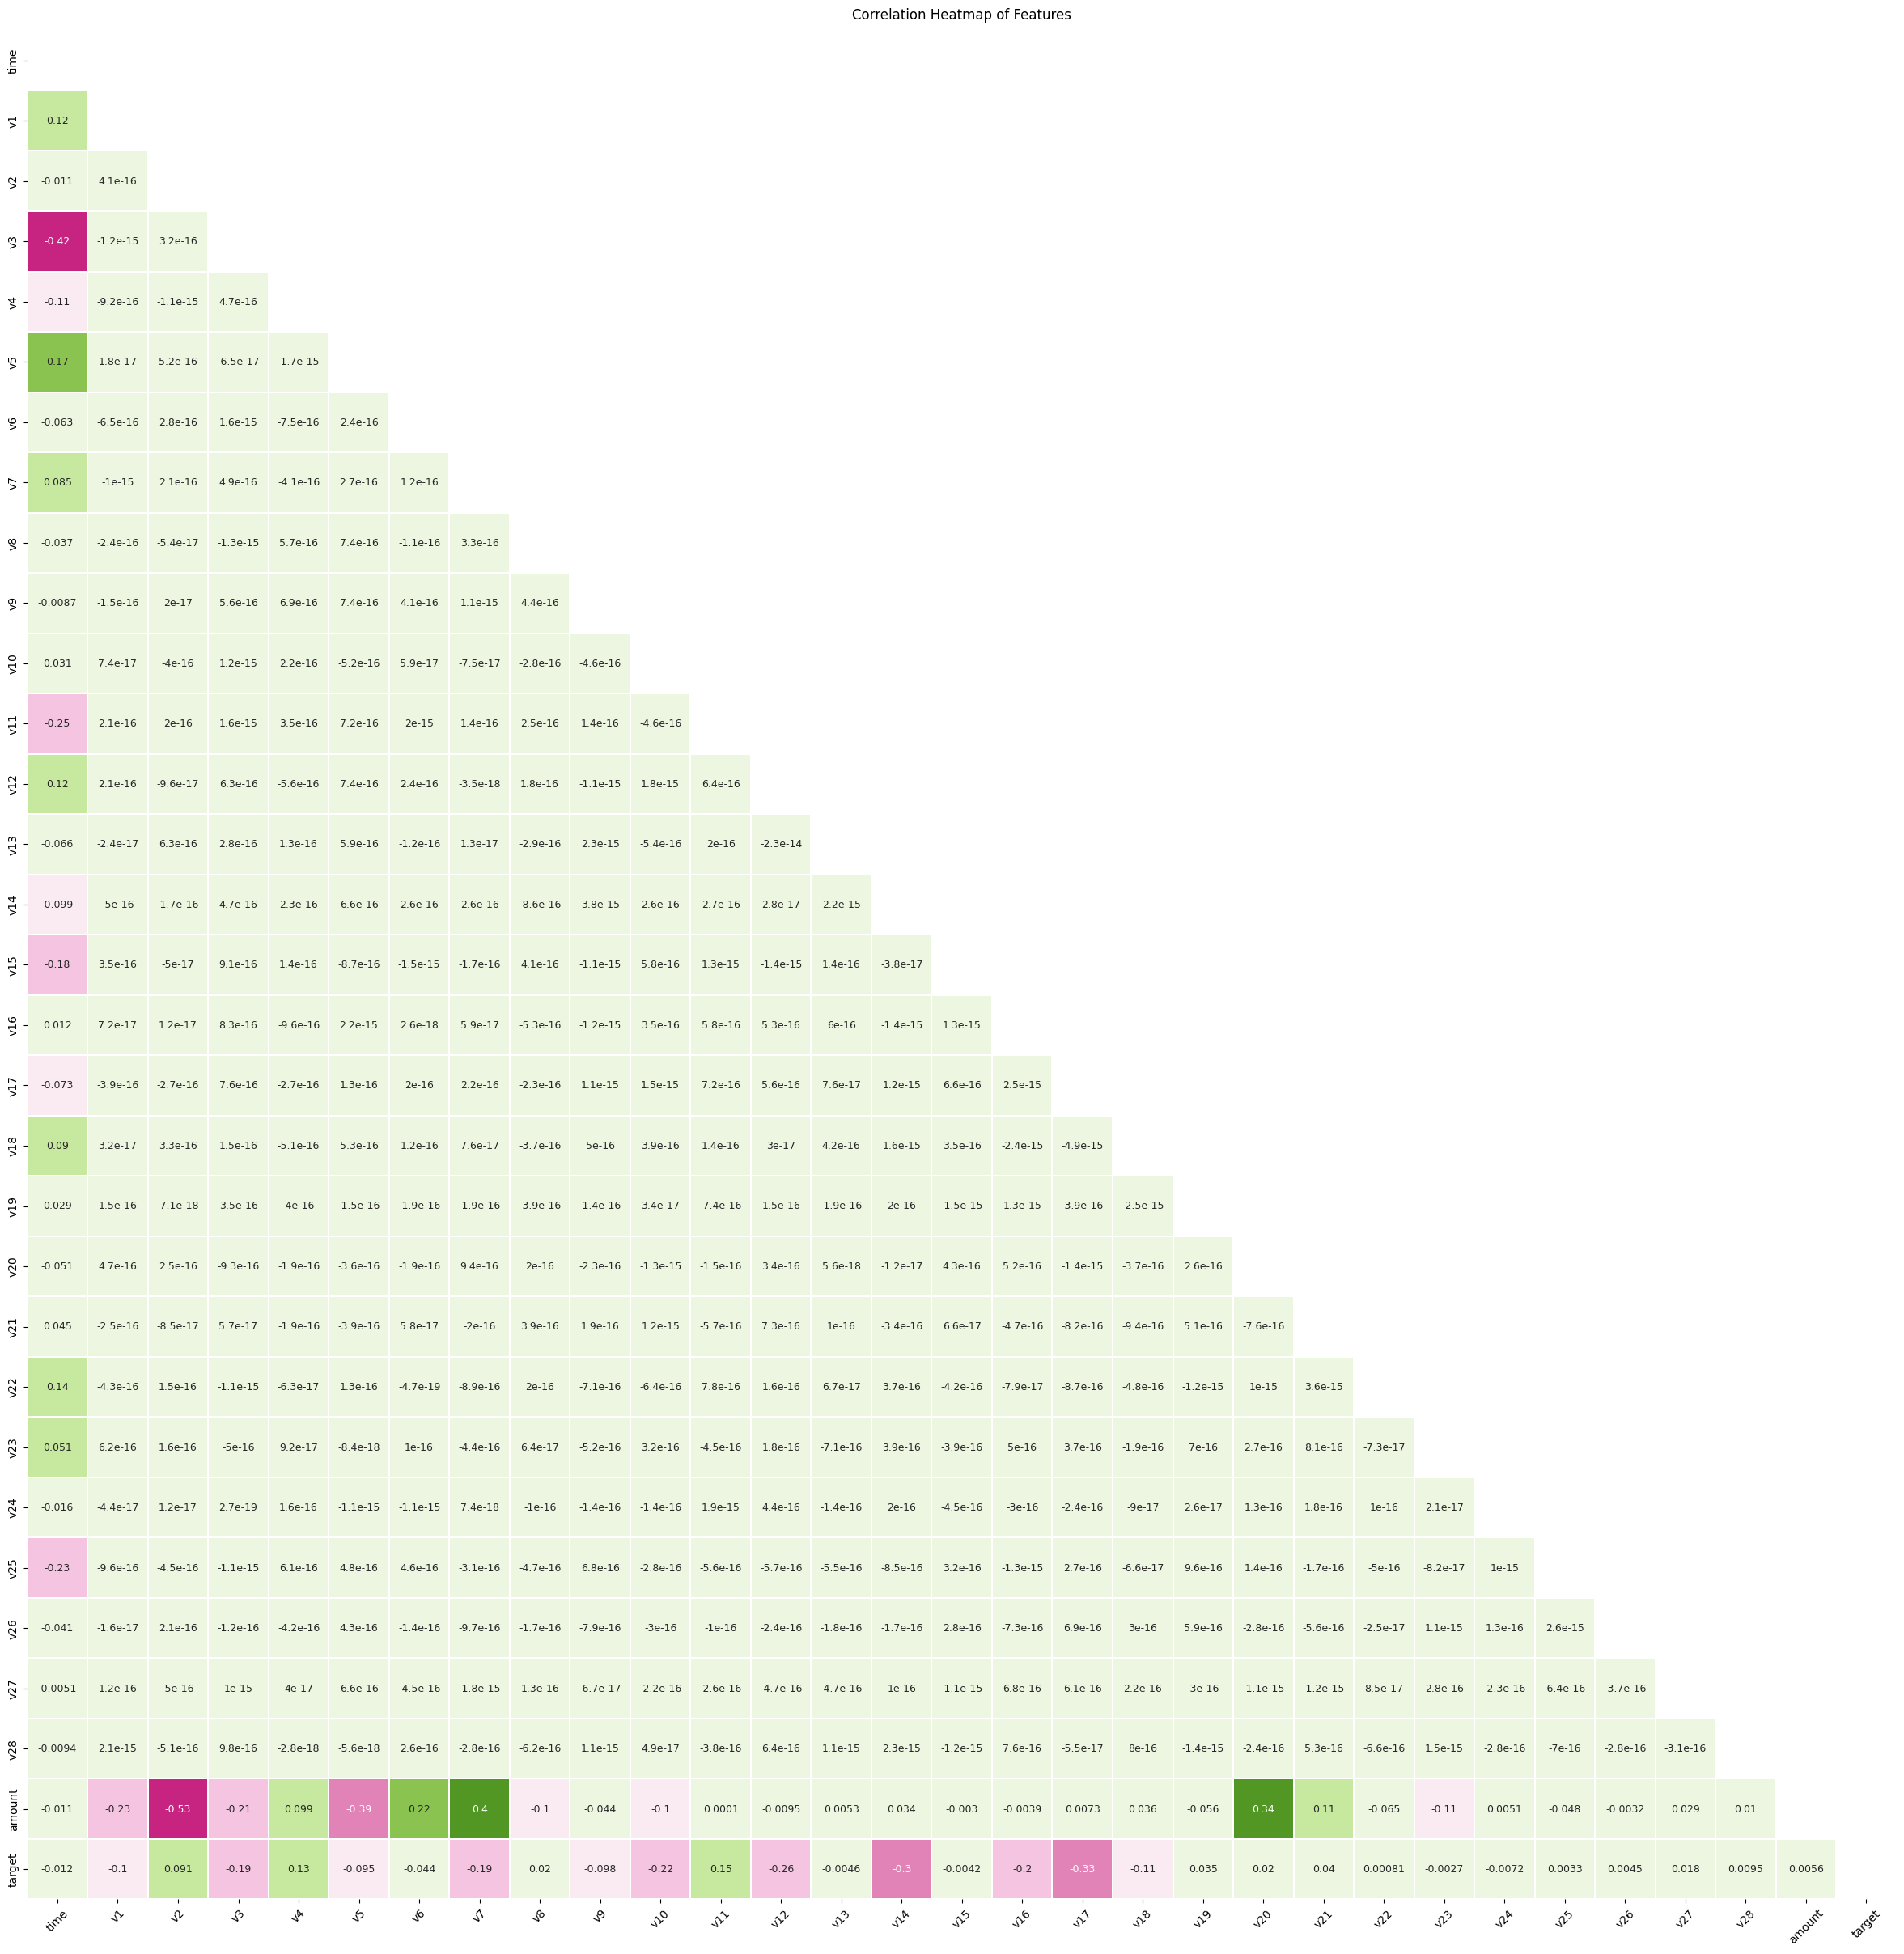

In [12]:
plt.figure(figsize=(30, 30))

lower_triangle = np.triu(data.corr())

corr_matrix = sns.heatmap(data.corr(),
                          annot=True,
                          cmap=sns.color_palette("PiYG", 8),
                          mask=lower_triangle,
                          square=True,
                          linewidths=0.25,
                          cbar=False,
                          annot_kws={"size":9})

corr_matrix.set_title("Correlation Heatmap of Features",
                      pad=10)

corr_matrix.set_xticklabels(corr_matrix.get_xticklabels(),
                            rotation=45)
plt.show()

### Exploratory Data Analysis & Preprocessing

#### Descriptive Statistics

In [13]:
data.describe(percentiles=[0.01, 0.10, 0.25, 0.50, 0.75, 0.90, 0.99], include='all')

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,target
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
1%,2422.000000,-6.563199e+00,-4.960300e+00,-3.978377e+00,-3.122987e+00,-3.060396e+00,-2.124023e+00,-3.012847e+00,-4.033899e+00,-2.455288e+00,...,-1.469679e+00,-1.654625e+00,-1.193417e+00,-1.657308e+00,-1.420859e+00,-1.009384e+00,-1.247746e+00,-8.762654e-01,0.120000,0.000000
10%,35027.000000,-1.893272e+00,-1.359862e+00,-1.802587e+00,-1.656329e+00,-1.302171e+00,-1.167450e+00,-1.078148e+00,-4.589454e-01,-1.294047e+00,...,-3.674467e-01,-8.674884e-01,-3.286342e-01,-8.703584e-01,-6.061010e-01,-5.480343e-01,-2.114656e-01,-1.556155e-01,1.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
90%,157640.400000,2.015409e+00,1.326635e+00,1.676173e+00,1.482807e+00,1.407893e+00,1.509365e+00,1.039387e+00,7.693811e-01,1.301671e+00,...,3.761555e-01,9.148826e-01,3.392860e-01,7.054036e-01,6.009027e-01,6.889469e-01,2.653679e-01,1.799362e-01,203.000000,0.000000


### Prepare Shared Pipeline Data & Stages/Steps

In [14]:
y = data['target']
X = data.drop(columns=['target'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(f"Training Input Dataset Shape: {X_train.shape}")
print(f"Training Output Dataset Shape: {y_train.shape}")

print(f"Evaluation Input Dataset Shape: {X_test.shape}")
print(f"Evaluation Output Dataset Shape: {y_test.shape}")

Training Input Dataset Shape: (213605, 30)
Training Output Dataset Shape: (213605,)
Evaluation Input Dataset Shape: (71202, 30)
Evaluation Output Dataset Shape: (71202,)


#### Metrics Evaluation Method

In [15]:
def metrics_evaluation(classifier_type,
                       y_test,
                       y_pred_cv):


    print("+-------------------------------------------------------------------------+")
    print("|  " + ("Confusion Matrix for " + classifier_type).center(69) + "  |")
    print("+-------------------------------------------------------------------------+")

    cm = confusion_matrix(y_test,
                          y_pred_cv)

    display_cm = ConfusionMatrixDisplay(cm,
                                        display_labels=[
                                            "Normal",
                                            "Fraud"
                                            ]
                                        )

    display_cm.plot()
    plt.show()

    print("+-----------------------------------------------------+")
    print("|  " + ("Classification Report for " + classifier_type).center(49) + "  |")
    print("+-----------------------------------------------------+")

    print(classification_report(y_test,
                                y_pred_cv,
                                zero_division=0,
                                target_names=[
                                    "Normal",
                                    "Fraud"
                                    ]
                                )
          )

### Auto-Sklearn Classification

#### Define Pipeline/Model

In [16]:
asc_pipe = AutoSklearnClassifier()

#### Fit Dataset to Auto-Sklearn Regressor

In [17]:
asc_model = asc_pipe.fit(X_train,
                         y_train)

[WARNING] [2023-06-19 17:15:26,281:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2023-06-19 17:21:27,633:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2023-06-19 17:24:50,928:Client-EnsembleBuilder] No models better than random - using Dummy losses!
	Models besides current dummy model: 0
	Dummy models: 1
[WARNING] [2023-06-19 17:26:18,294:Client-EnsembleBuilder] No models better than random - using Dummy losses!
	Models besides current dummy model: 0
	Dummy models: 1


#### Generate Predictions

In [18]:
predictions = asc_model.predict(X_test)

#### Metrics Evaluation

+-------------------------------------------------------------------------+
|               Confusion Matrix for Auto-Sklearn Regression              |
+-------------------------------------------------------------------------+


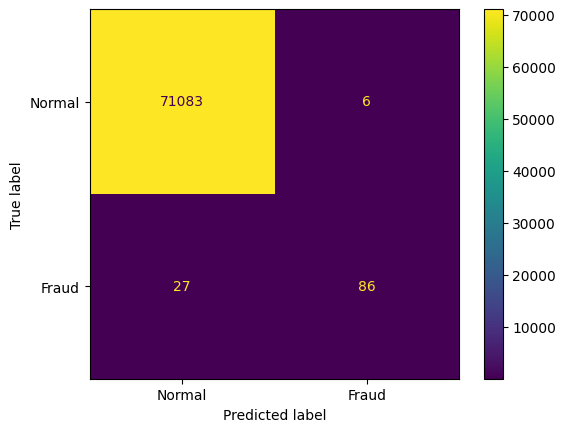

+-----------------------------------------------------+
|  Classification Report for Auto-Sklearn Regression  |
+-----------------------------------------------------+
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     71089
       Fraud       0.93      0.76      0.84       113

    accuracy                           1.00     71202
   macro avg       0.97      0.88      0.92     71202
weighted avg       1.00      1.00      1.00     71202



In [19]:
metrics_evaluation("Auto-Sklearn Regression",
                   y_test,
                   predictions)

### Notes & Other Takeaways From This Project
****
- I did not provide visuals of the generically labeled features (the ones that start with v) because without more knowledge of what those are, there is little meaning with having visualizations of them.
- Given the very serious nature of credit card fraud, I would ideally like to see better detection of fraudulent transactions. If there was any error, I would prefer that it overpredicted fraudulent transactions instead of underpredicting it (such as what occurred in this model.
- All of that said, this is a solid start.
****

### Citations

- Auto-Sklearn
    > @inproceedings{feurer-neurips15a, title = {Efficient and Robust Automated Machine Learning}, author = {Feurer, Matthias and Klein, Aaron and Eggensperger, Katharina and Springenberg, Jost and Blum, Manuel and Hutter, Frank}, booktitle = {Advances in Neural Information Processing Systems 28 (2015)}, pages = {2962--2970}, year = {2015}}

    > @article{feurer-arxiv20a, title = {Auto-Sklearn 2.0: Hands-free AutoML via Meta-Learning}, author = {Feurer, Matthias and Eggensperger, Katharina and Falkner, Stefan and Lindauer, Marius and Hutter, Frank}, journal = {arXiv:2007.04074 [cs.LG]}, year = {2020},}